In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('default of credit card clients.xls',header=0)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [7]:
df.shape

(30000, 25)

In [8]:
df = df.apply(pd.to_numeric)

In [9]:
df = df.drop(columns=['ID'])

y = df['default payment next month']
X = df.drop(columns = ['default payment next month'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,         
    learning_rate=0.1,        
    max_depth=4,              
    subsample=0.8,            
    colsample_bytree=0.8,     
    eval_metric='logloss',   
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8173333333333334
ROC AUC: 0.7730452529893626

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Confusion_matrix:
 [[4423  250]
 [ 846  481]]


## Handle Class Imbalance

In [13]:
y.value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [14]:
count0 = (y_train==0).sum()
count1 = (y_train==1).sum()

scale_pos_weight = count0/count1

model1 = XGBClassifier(n_estimators=300,
                      learning_rate=0.1,
                      max_depth=4,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      random_state=42,
                      eval_metric='logloss',
                      scale_pos_weight=scale_pos_weight)
model1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7568333333333334
ROC AUC: 0.771693067213712

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.46      0.61      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000


Confusion_matrix:
 [[3726  947]
 [ 512  815]]


In [16]:
scale_pos_weight

np.float64(3.520625353173856)

## Tune Threshold

In [17]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7903333333333333
ROC AUC: 0.7730452529893626

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.52      0.55      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000


Confusion_matrix:
 [[4015  658]
 [ 600  727]]


## Cross-validate to Tune Tree Complexity

Reducing tree depth (max_depth=3)

Increasing min_child_weight (min_child_weight=5 or 10)

Adding regularization (reg_lambda and reg_alpha > 0)

In [18]:
model2 = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    reg_lambda=1,
    reg_alpha=0.1
)

model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7623333333333333
ROC AUC: 0.7762371209747478

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000


Confusion_matrix:
 [[3751  922]
 [ 504  823]]


## Hyperparameter Tuning

In [20]:
from  sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[200,300,500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 6],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

grid_search = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    scoring='roc_auc',   
    cv=3,
    verbose=1,
    n_jobs=-1
)

Grid SEarch will be Fitting 3 folds for each of 972 candidates, totalling 2916 fits. So we are not doing that.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model2,
    param_distributions=param_grid,
    n_iter=30,        
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best AUC:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best AUC: 0.7826228155752187


In [22]:
best_model = random_search.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [23]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7626666666666667
ROC AUC: 0.7779115897882801

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000


Confusion_matrix:
 [[3754  919]
 [ 505  822]]


## Early stopping

In [26]:
import xgboost as xgb

best_early_model = xgb.XGBClassifier(
    n_estimators=1000,
    early_stopping_rounds=50,  
    eval_metric='logloss',
    subsample=0.8,
    min_child_weight=10,
    max_depth=4,
    learning_rate=0.05,
    gamma=0,
    colsample_bytree=0.8
)

In [27]:
best_early_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-logloss:0.51890
[1]	validation_0-logloss:0.51045
[2]	validation_0-logloss:0.50487
[3]	validation_0-logloss:0.49992
[4]	validation_0-logloss:0.49555
[5]	validation_0-logloss:0.49003
[6]	validation_0-logloss:0.48495
[7]	validation_0-logloss:0.48187
[8]	validation_0-logloss:0.47774
[9]	validation_0-logloss:0.47399
[10]	validation_0-logloss:0.47161
[11]	validation_0-logloss:0.46827
[12]	validation_0-logloss:0.46547
[13]	validation_0-logloss:0.46290
[14]	validation_0-logloss:0.46065
[15]	validation_0-logloss:0.45852
[16]	validation_0-logloss:0.45720
[17]	validation_0-logloss:0.45596
[18]	validation_0-logloss:0.45409
[19]	validation_0-logloss:0.45241
[20]	validation_0-logloss:0.45084
[21]	validation_0-logloss:0.44947
[22]	validation_0-logloss:0.44832
[23]	validation_0-logloss:0.44719
[24]	validation_0-logloss:0.44605
[25]	validation_0-logloss:0.44508
[26]	validation_0-logloss:0.44450
[27]	validation_0-logloss:0.44376
[28]	validation_0-logloss:0.44305
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = best_early_model.predict(X_test)
y_proba = best_early_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.818
ROC AUC: 0.7814629118099115

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Confusion_matrix:
 [[4434  239]
 [ 853  474]]


### using EarlyStopping callback

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost.callback import EarlyStopping


early_stopping = EarlyStopping(
    rounds=50,           # Number of rounds to wait
    min_delta=0.001,     # Minimum improvement needed to continue
    metric_name='logloss', # Metric to monitor
    data_name='validation_0'
)

final_model = xgb.XGBClassifier(n_estimators=1000, callbacks=[early_stopping])

final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-logloss:0.47714
[1]	validation_0-logloss:0.45707
[2]	validation_0-logloss:0.44698
[3]	validation_0-logloss:0.44145
[4]	validation_0-logloss:0.43745
[5]	validation_0-logloss:0.43625
[6]	validation_0-logloss:0.43460
[7]	validation_0-logloss:0.43415
[8]	validation_0-logloss:0.43363
[9]	validation_0-logloss:0.43363
[10]	validation_0-logloss:0.43340
[11]	validation_0-logloss:0.43352
[12]	validation_0-logloss:0.43383
[13]	validation_0-logloss:0.43361
[14]	validation_0-logloss:0.43415
[15]	validation_0-logloss:0.43415
[16]	validation_0-logloss:0.43376
[17]	validation_0-logloss:0.43402
[18]	validation_0-logloss:0.43411
[19]	validation_0-logloss:0.43439
[20]	validation_0-logloss:0.43471
[21]	validation_0-logloss:0.43445
[22]	validation_0-logloss:0.43444
[23]	validation_0-logloss:0.43421
[24]	validation_0-logloss:0.43512
[25]	validation_0-logloss:0.43587
[26]	validation_0-logloss:0.43605
[27]	validation_0-logloss:0.43660
[28]	validation_0-logloss:0.43697
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x0000019C2E873410>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

models = [model, model1, model2, best_model, best_early_model]
model_names = ['model', 'model1', 'model2', 'best_model', 'best_early_model']

results = []

for m, name in zip(models, model_names):
    y_pred = m.predict(X_test)
    y_proba = m.predict_proba(X_test)[:, 1] 
    
    results.append({
        'Model': name,
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4),
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-score': round(f1_score(y_test, y_pred), 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

              Model  ROC-AUC  Accuracy  Precision  Recall  F1-score
0             model   0.7730    0.8173     0.6580  0.3625    0.4674
1            model1   0.7717    0.7568     0.4625  0.6142    0.5277
2            model2   0.7762    0.7623     0.4716  0.6202    0.5358
3        best_model   0.7779    0.7627     0.4721  0.6194    0.5359
4  best_early_model   0.7815    0.8180     0.6648  0.3572    0.4647


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

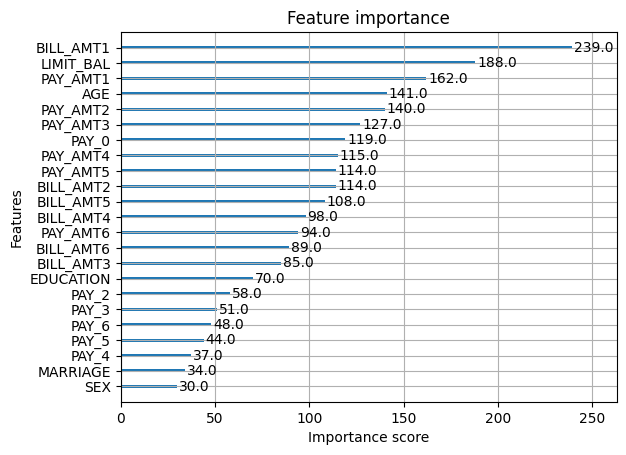

In [31]:
from xgboost import plot_importance

plot_importance(best_early_model)